# Customer interaction strategy for the gym chain

# Description

The goal of this project is to support decision making for the gym chain Model Fitness for developing a customer interaction strategy based on analytical data. Model Fitness has digitized a number of its customer profiles. Task is to analyze profiles and come up with a customer retention strategy aiming to fight churn.

Project goals and tasks:

* 		data assesment
* 		predict the probability of churn (for the upcoming month) for each customer
* 		Draw up typical user portraits: select the most outstanding groups and describe their main features
* 		Analyze the factors that impact churn most
* 		Draw basic conclusions and develop recommendations on how to improve customer service:
    * 		Identify target groups
    * 		Suggest measures to cut churn
    * 		Describe any other patterns you see with respect to interaction with customers


## Data preparation

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy import stats

In [4]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('gym_churn_us.csv')

In [7]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [9]:
df.duplicated().sum()

0

Comment

CSV files containing data on churn for a given month and information on the month preceding it. Has 14 columns and 4000 rows, no missing values or duplicates. All columns numerical int64 or float64.

## Exploratory data analysis (EDA)

* 		Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
* 		Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
* 		Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
* 		Build a correlation matrix and display it.

### Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).

In [10]:
df.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Average Contract_period is 4,68 month with standard deviation 4,55. Additional charges on the average is around 147 with a standard deviation of around 96.4, maximum is 552,6. Churn mean is 0.26, meaning around 27% of customers churn. Average age is 29 years, standard deviation 3, age varies from 18 to 41. Average lifetime is almost 4 months, 31 months is a maximum.

In [11]:
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0


### Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

In [12]:
(round(df["Churn"].value_counts()/df.shape[0],2)).to_frame("Churn Proportions")

,Churn Proportions
0,0.73
1,0.27


Around 27% of customers churn, and about 73% of customers stayed.

In [13]:
df_mean = df.groupby(['Churn']).mean()

In [14]:
df_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Gender has equal means for churn and non-churn, same for users provided their phone number. 
The mean age of churn customers is almost 27 while the mean age of non-churn customers is almost 30 years. Younger people are more likely to leave a gym than older people. The average lifetime of non-churn customers is 4,7 months and churn customers is 1 month. Non-churn customers has a higher average additional charges in total than churn customers (158 and 115 accordingly). Customers, who are employees of a partner company or customers, who originally signed up through a "bring a friend" offer, are also tend to stay more, than who joined without additional programms.

### Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

In [15]:
df_ch = df.query('Churn == 1')

In [16]:
df_ch.head(4)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1


In [17]:
df_st = df.query('Churn == 0')

In [18]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             2939 non-null   int64  
 1   Near_Location                      2939 non-null   int64  
 2   Partner                            2939 non-null   int64  
 3   Promo_friends                      2939 non-null   int64  
 4   Phone                              2939 non-null   int64  
 5   Contract_period                    2939 non-null   int64  
 6   Group_visits                       2939 non-null   int64  
 7   Age                                2939 non-null   int64  
 8   Avg_additional_charges_total       2939 non-null   float64
 9   Month_to_end_contract              2939 non-null   float64
 10  Lifetime                           2939 non-null   int64  
 11  Avg_class_frequency_total          2939 non-null   float

In [19]:
df_st.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


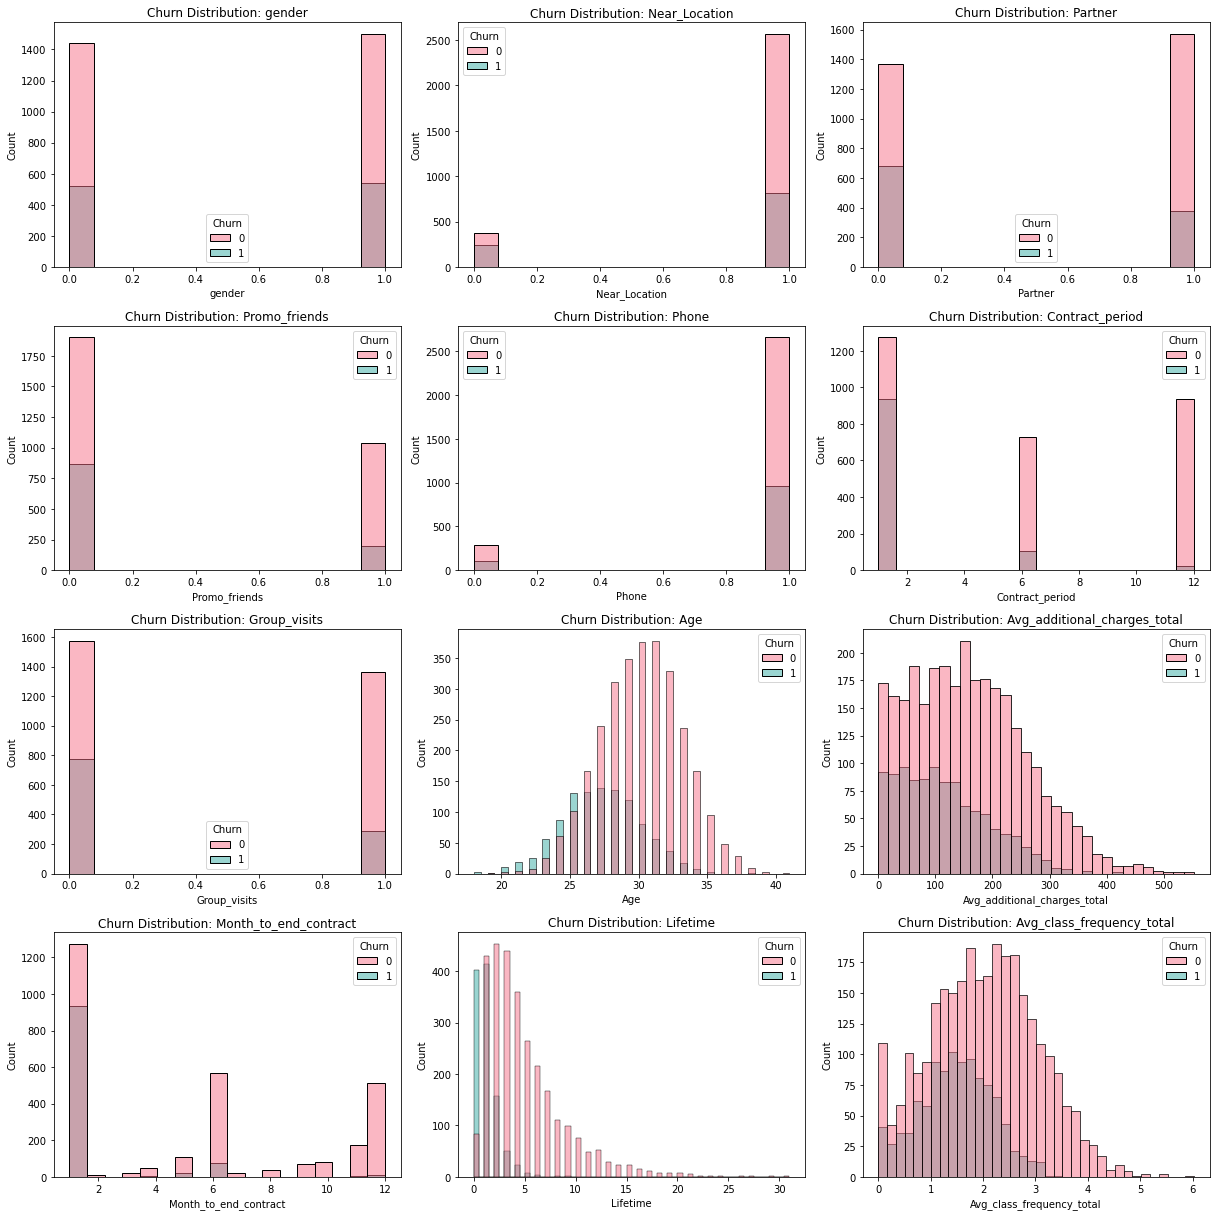

In [20]:
count=1
plt.subplots(figsize=(17, 17))
for i in df.drop('Churn',axis=1).columns:
    if count > 12:
        continue
    else:
        plt.subplot(4,3,count)
        plt.title('Churn Distribution: {}'.format(str(i)))
        sns.histplot(data=df, x=i, hue='Churn', palette='husl')
        count+=1
plt.tight_layout()
plt.show()

Distribution of gender has almost no difference for both groups - churn and non-churn. Whether the user lives or works in the neighborhood where the gym is located is playing role in a churn - more than half of customers who has no near location churn while less than half of those who located near to the gym churn.

Nearly half of customers, who is not a participant of a programms 'partner' or 'friend' - churn, share of non-churn customers between programms participants are significantly higher.  

Share of customers who signed 1 month contract are more than those who signed 6 and 12 months contract, more than 70% of customers who sign 1 month contract churn. While less than 10% of customers who sign 12 months contract churn.
Age distribution - younger people are more likely to churn than older. Liftime distribution - new customers are more likely to churn than old customers.

### Build a correlation matrix and display it.

In [21]:
dfc = df.corr()

In [22]:
dfc

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


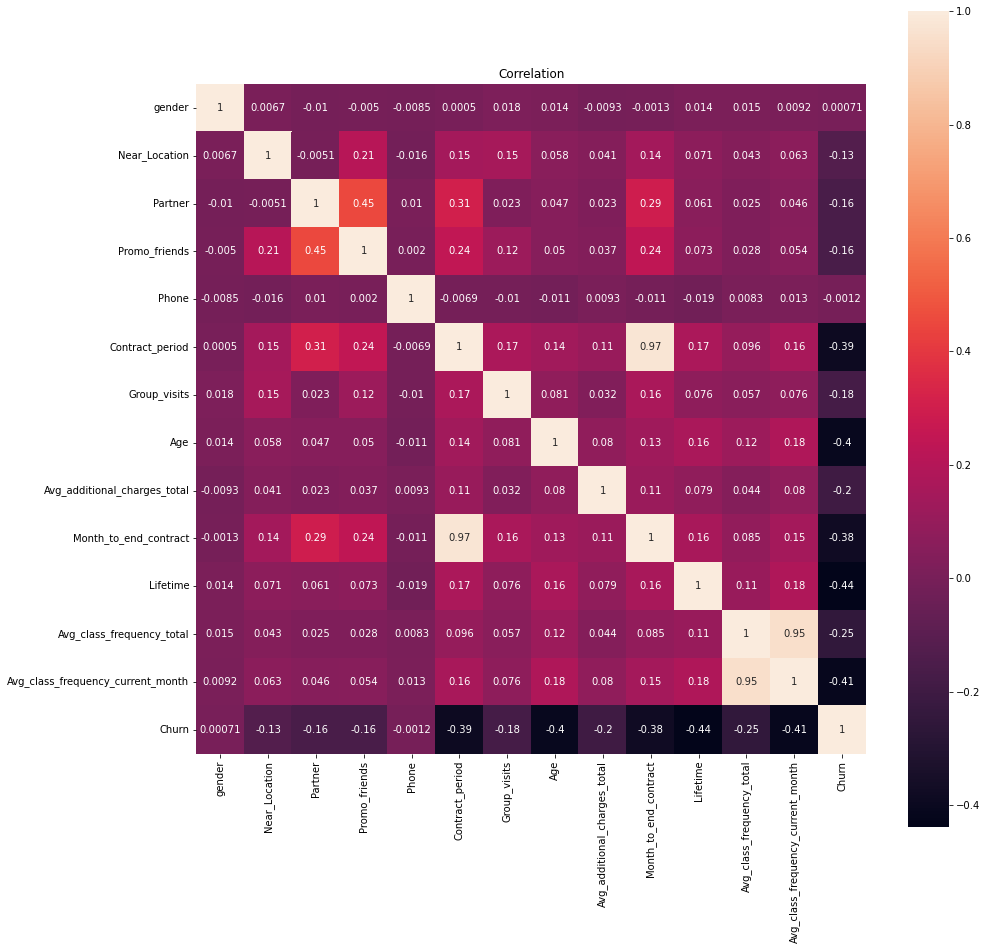

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(dfc, annot = True, square=True)
plt.title('Correlation')
plt.show()

'Avg_class_frequency_current_month' and 'avg_class_frequency_total' has a correlation of 0.95 which indicates presence of multicollinearity between the two variables. 'Avg_class_frequency_current_month' we be dropped.
'Month_to_end_contract' and 'Contract_period' has a correlation of 0.97, but these columns are categorical.

In [26]:
df.drop(['Avg_class_frequency_current_month'], axis=1, inplace= True)

In [27]:
dfch = df_ch.corr()

In [28]:
dfst = df_st.corr()

EDA analysis showed the distribution of features based on churn. Correlation showed presence of multicollinearity, 'Avg_class_frequency_current_month' was removed to prepare the data for building a model to predicting user churn.

## Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.
* 		Divide the data into train and validation sets using the train_test_split() function.
* 		Train the model on the train set with two methods:
    * 		logistic regression
    * 		random forest
* 		Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
Remember to indicate the random_state parameter when dividing data and defining the algorithm.


### Divide the data into train and validation sets using the train_test_split() function.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        4000 non-null   int64  
 1   Near_Location                 4000 non-null   int64  
 2   Partner                       4000 non-null   int64  
 3   Promo_friends                 4000 non-null   int64  
 4   Phone                         4000 non-null   int64  
 5   Contract_period               4000 non-null   int64  
 6   Group_visits                  4000 non-null   int64  
 7   Age                           4000 non-null   int64  
 8   Avg_additional_charges_total  4000 non-null   float64
 9   Month_to_end_contract         4000 non-null   float64
 10  Lifetime                      4000 non-null   int64  
 11  Avg_class_frequency_total     4000 non-null   float64
 12  Churn                         4000 non-null   int64  
dtypes: 

In [30]:
df.head(2)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,0


In [31]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 

#print(X_train_st[:2])

X_test_st = scaler.transform(X_test)

Data devided into train and validation sets using the train_test_split() function. Than splited into 80% training and 20% validation.

### Train the model on the train set with two methods:
    * 		logistic regression
    * 		random forest

#### Logistic regression

In [32]:
# define the model's algorithm
model = LogisticRegression() #random_state=42

In [33]:
# train your model
model.fit(X_train_st, y_train)

LogisticRegression()

In [34]:
# use the trained model to make forecasts
LR_probabilities = model.predict_proba(X_test_st)

In [35]:
# binary prediction
LR_predictions = model.predict(X_test_st)

In [36]:
r2 = r2_score(y_test, LR_predictions)

In [37]:
print('R-squared value: ', r2)

R-squared value:  0.4762929018984382


#### Random forest

In [39]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# train the random forest model
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

The model trained on the train set with two methods: logistic regression and random forest.

### Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

In [40]:
print('Metrics for the automatic prediction made with predict')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, LR_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, LR_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, LR_predictions)))

Metrics for the automatic prediction made with predict
Accuracy: 0.895
Precision: 0.825
Recall: 0.788


In [41]:
print('Metrics for the automatic prediction made with predict')
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.3f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.3f}'.format(recall_score(y_test, rf_predictions)))

Metrics for the automatic prediction made with predict
Accuracy: 0.886
Precision: 0.823
Recall: 0.752


In [42]:
def print_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [43]:
print_metrics(y_test, LR_predictions, title='Metrics for Logistic Regression:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, LR_predictions))

print()

Metrics for Logistic Regression:
	Accuracy: 0.90
	Precision: 0.83
	Recall: 0.79

Displaying report in classes:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       578
           1       0.83      0.79      0.81       222

    accuracy                           0.90       800
   macro avg       0.87      0.86      0.87       800
weighted avg       0.89      0.90      0.89       800




In [44]:
print_metrics(y_test, rf_predictions, title='Metrics for Random forest:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, rf_predictions))

print()

Metrics for Random forest:
	Accuracy: 0.89
	Precision: 0.82
	Recall: 0.75

Displaying report in classes:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       578
           1       0.82      0.75      0.79       222

    accuracy                           0.89       800
   macro avg       0.87      0.84      0.85       800
weighted avg       0.88      0.89      0.88       800




Accuracy, precision, and recall for both models evaluated using the validation data. These metrics used to compare the models and choose the model that gave better results. The logistic regression has an accuracy of 90%, a precision of 82%, and a recall of 79%. The randomforest model has an accuracy of 90%, a precision of 84%, and a recall of 76%. The metrics are not significantly different. As Churn is the main interest, the recall score is more important than precision as we are solely interested in true churn cases.

The logistic regression performed better, and will be chosen comparing to other model.

## Create user clusters

Set aside the column with data on churn and identify object (user) clusters:
* 		Standardize the data.
* 		Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
* 		Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
* 		Look at the mean feature values for clusters. Does anything catch your eye?
* 		Plot distributions of features for the clusters. Do you notice anything?
* 		Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?


### Standardize the data

In [40]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

### Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

In [41]:
linked = linkage(x_sc, method = 'ward')

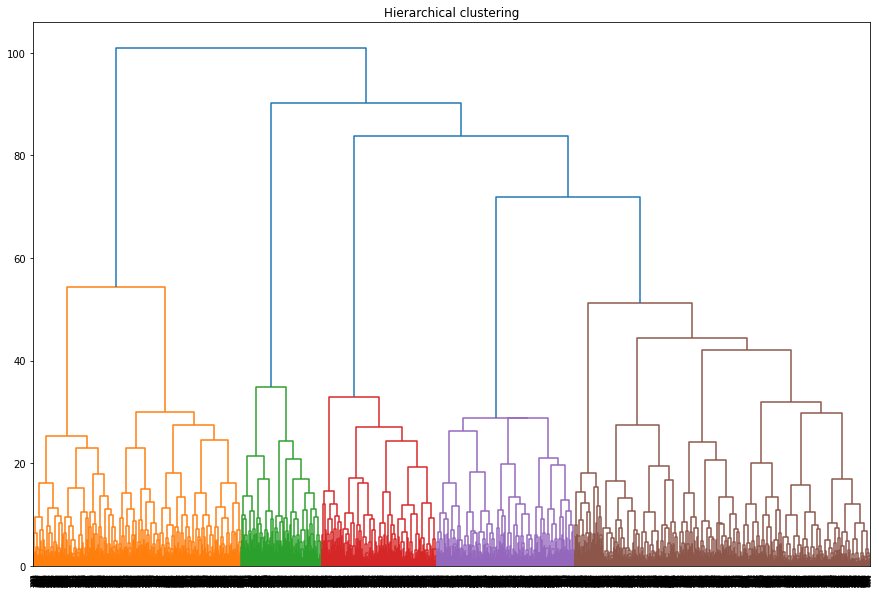

In [42]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show() 

The suggested optimal number of clusters is 5, corresponds to the five different colors on the plot.

### Train the clustering model with the K-means algorithm and predict customer clusters. 

Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.

In [43]:
# the obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

#### Look at the mean feature values for clusters. Does anything catch your eye?

In [44]:
df['cluster'] = labels
 
df_grouped = df.groupby('cluster').mean().reset_index()

In [45]:
df_grouped

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
0,0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839
1,1,0.506089,0.932341,0.487145,0.000000,1.0,9.621110,0.499323,30.002706,163.264619,8.805142,4.594046,2.066730,0.039242
2,2,0.508907,1.000000,0.323040,0.233373,1.0,1.276128,0.371734,28.745249,139.034913,1.230998,3.170428,1.784057,0.401425
3,3,0.515373,0.988287,0.913616,1.000000,1.0,9.582723,0.556369,29.762811,158.817572,8.734993,4.705710,2.020678,0.043924
4,4,0.503937,0.000000,0.466535,0.078740,1.0,2.120079,0.214567,28.584646,135.533080,2.009843,2.814961,1.749144,0.438976


Total 5 clusters, from 0 to 4. Best results has cluster 3: highest Avg_additional_charges_total = 166, while others 136-144; Longest Month_to_end_contract	- 10,6 (others from 2 to 4); and lowest Churn = 0,02. Cluster 1 and 2 has the highest mean in terms of near location = 0,99 and 1 respectively. The average age in all the clusters are almost the same - around 29 years.

#### Plot distributions of features for the clusters. Do you notice anything?

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        4000 non-null   int64  
 1   Near_Location                 4000 non-null   int64  
 2   Partner                       4000 non-null   int64  
 3   Promo_friends                 4000 non-null   int64  
 4   Phone                         4000 non-null   int64  
 5   Contract_period               4000 non-null   int64  
 6   Group_visits                  4000 non-null   int64  
 7   Age                           4000 non-null   int64  
 8   Avg_additional_charges_total  4000 non-null   float64
 9   Month_to_end_contract         4000 non-null   float64
 10  Lifetime                      4000 non-null   int64  
 11  Avg_class_frequency_total     4000 non-null   float64
 12  Churn                         4000 non-null   int64  
 13  clu

In [47]:
df.head(3)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,0,2


Distribution of continuous variables:


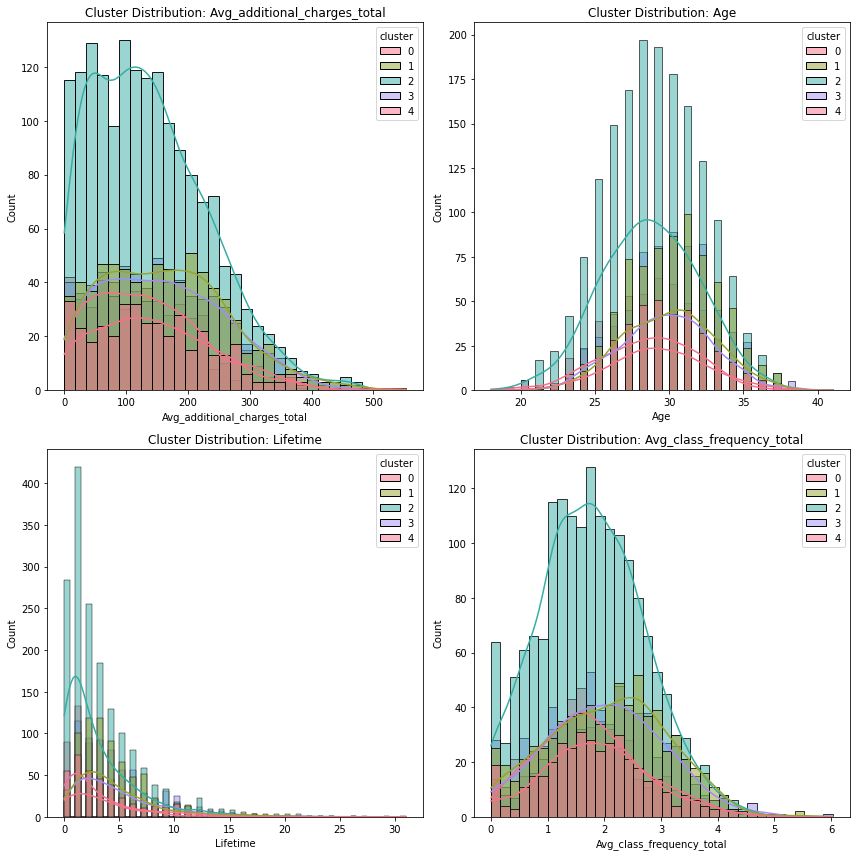

In [48]:
count=1
df_cont= df[['Avg_additional_charges_total', 'Age', 'Lifetime', 'Avg_class_frequency_total', 'Churn','cluster']]
plt.subplots(figsize=(12, 12))
for i in df_cont.drop(['Churn', 'cluster'],axis=1).columns:
    if count > 12:
        continue
    else:
        plt.subplot(2,2,count)
        sns.histplot(data= df_cont, x= i, hue="cluster", kde=True, palette="husl")
        plt.title('Cluster Distribution: {}'.format(str(i)))
        count+=1
print("Distribution of continuous variables:")

plt.tight_layout()
plt.show()

Age distributions for the clusters from 0 to 4 are normal, just cluster 3 has a peak age above 30 years. Average class frequency total is almost normally distributed for clusters. Average additional charges and lifetime are right skewed for all clusters.

#### Calculate the churn rate for each cluster (use the groupby() method). 

Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [49]:
churn = df.query('Churn == 1')

In [50]:
(churn.groupby('cluster')['Churn'].count()/df.groupby('cluster')['Churn'].count())\
.reset_index() #.rename(columns={'cluster': 'clusters', 'Churn': 'churn rate'})

,cluster,Churn
0,0,0.266839
1,1,0.039242
2,2,0.401425
3,3,0.043924
4,4,0.438976


Clasters are differ in terms of churn rate. 4 are prone to leaving, then goes 2, and after 0 and 1 with results cloes to each other. 3 is loyal.

## Conclusions and  recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

### Conclusions

 - 85% of customers has Location near. At the same time, more than half of customers who has no near location churn, while less than half of those who located near to the gym churn.
 - Loyalty programms. Nearly half of customers, who is not a participant of a programms 'partner' or 'friend' - churn, share of non-churn customers between programms participants are significantly higher.
 - Length of contract. Share of customers who signed 1 month contract are more than those who signed 6 and 12 months contract, more than 70% of customers who sign 1 month contract churn. While less than 10% of customers who sign 12 months contract churn. 
 - Older customers a little bit more loyal than younger
 - Gender has no affect
 - 5 clusters of customers
 - Overall churn rate is around 27%
 - Churn rates differ among clusters. 4 are prone to leaving, then goes 2, and after 0 and 1 with results cloes to each other. 3 is loyal.

### Recommendations

- Focus on loyalty programms around nearest locations and attracting customers through them
- Stimulate signing long-term contracts, probably also move from 1 month to 3 months contract
- Analize additional characteristic of 3rd claster, what makes them stay
- Analize gym services = for ex. is it just younger customers tend to churn more often, or gym is less attractive for them for some reason